Heart Disease Prediction using Machine Learning

1) Importing Essential Libraries

In [2]:
#Installation of required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter(action = "ignore")

In [3]:
#Reading the dataset
df = pd.read_csv("heart.csv")

Variable Explanation:
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

caa: number of major vessels (0-4)

cp : Chest Pain type chest pain type Value 1: typical angina Value 2: atypical angina Value 3: non-anginal pain Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results Value 0: normal Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

target : 0= less chance of heart attack 1= more chance of heart attack

In [4]:
# The first 5 observation units of the data set were accessed.
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
# The size of the data set was examined. It consists of 297 observation units and 14 variables.
df.shape

(297, 14)

In [6]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  target    297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [7]:
# Get the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,2.158249,0.964859,0.0,2.0,2.0,3.0,3.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


In [8]:
# The distribution of the Target variable was examined.
df["target"].value_counts()*100/len(df)

0    53.872054
1    46.127946
Name: target, dtype: float64

1- Defective Heart

0- Healthy Heart

In [9]:
df["target"].value_counts()

0    160
1    137
Name: target, dtype: int64

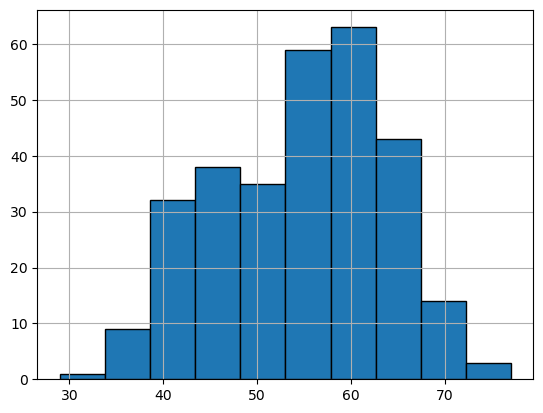

In [10]:
# The histagram of the Age variable was reached.
df["age"].hist(edgecolor = "black");

In [11]:
print("Max Age: " + str(df["age"].max()) + " Min Age: " + str(df["age"].min()))

Max Age: 77 Min Age: 29


<AxesSubplot:xlabel='thal', ylabel='Density'>

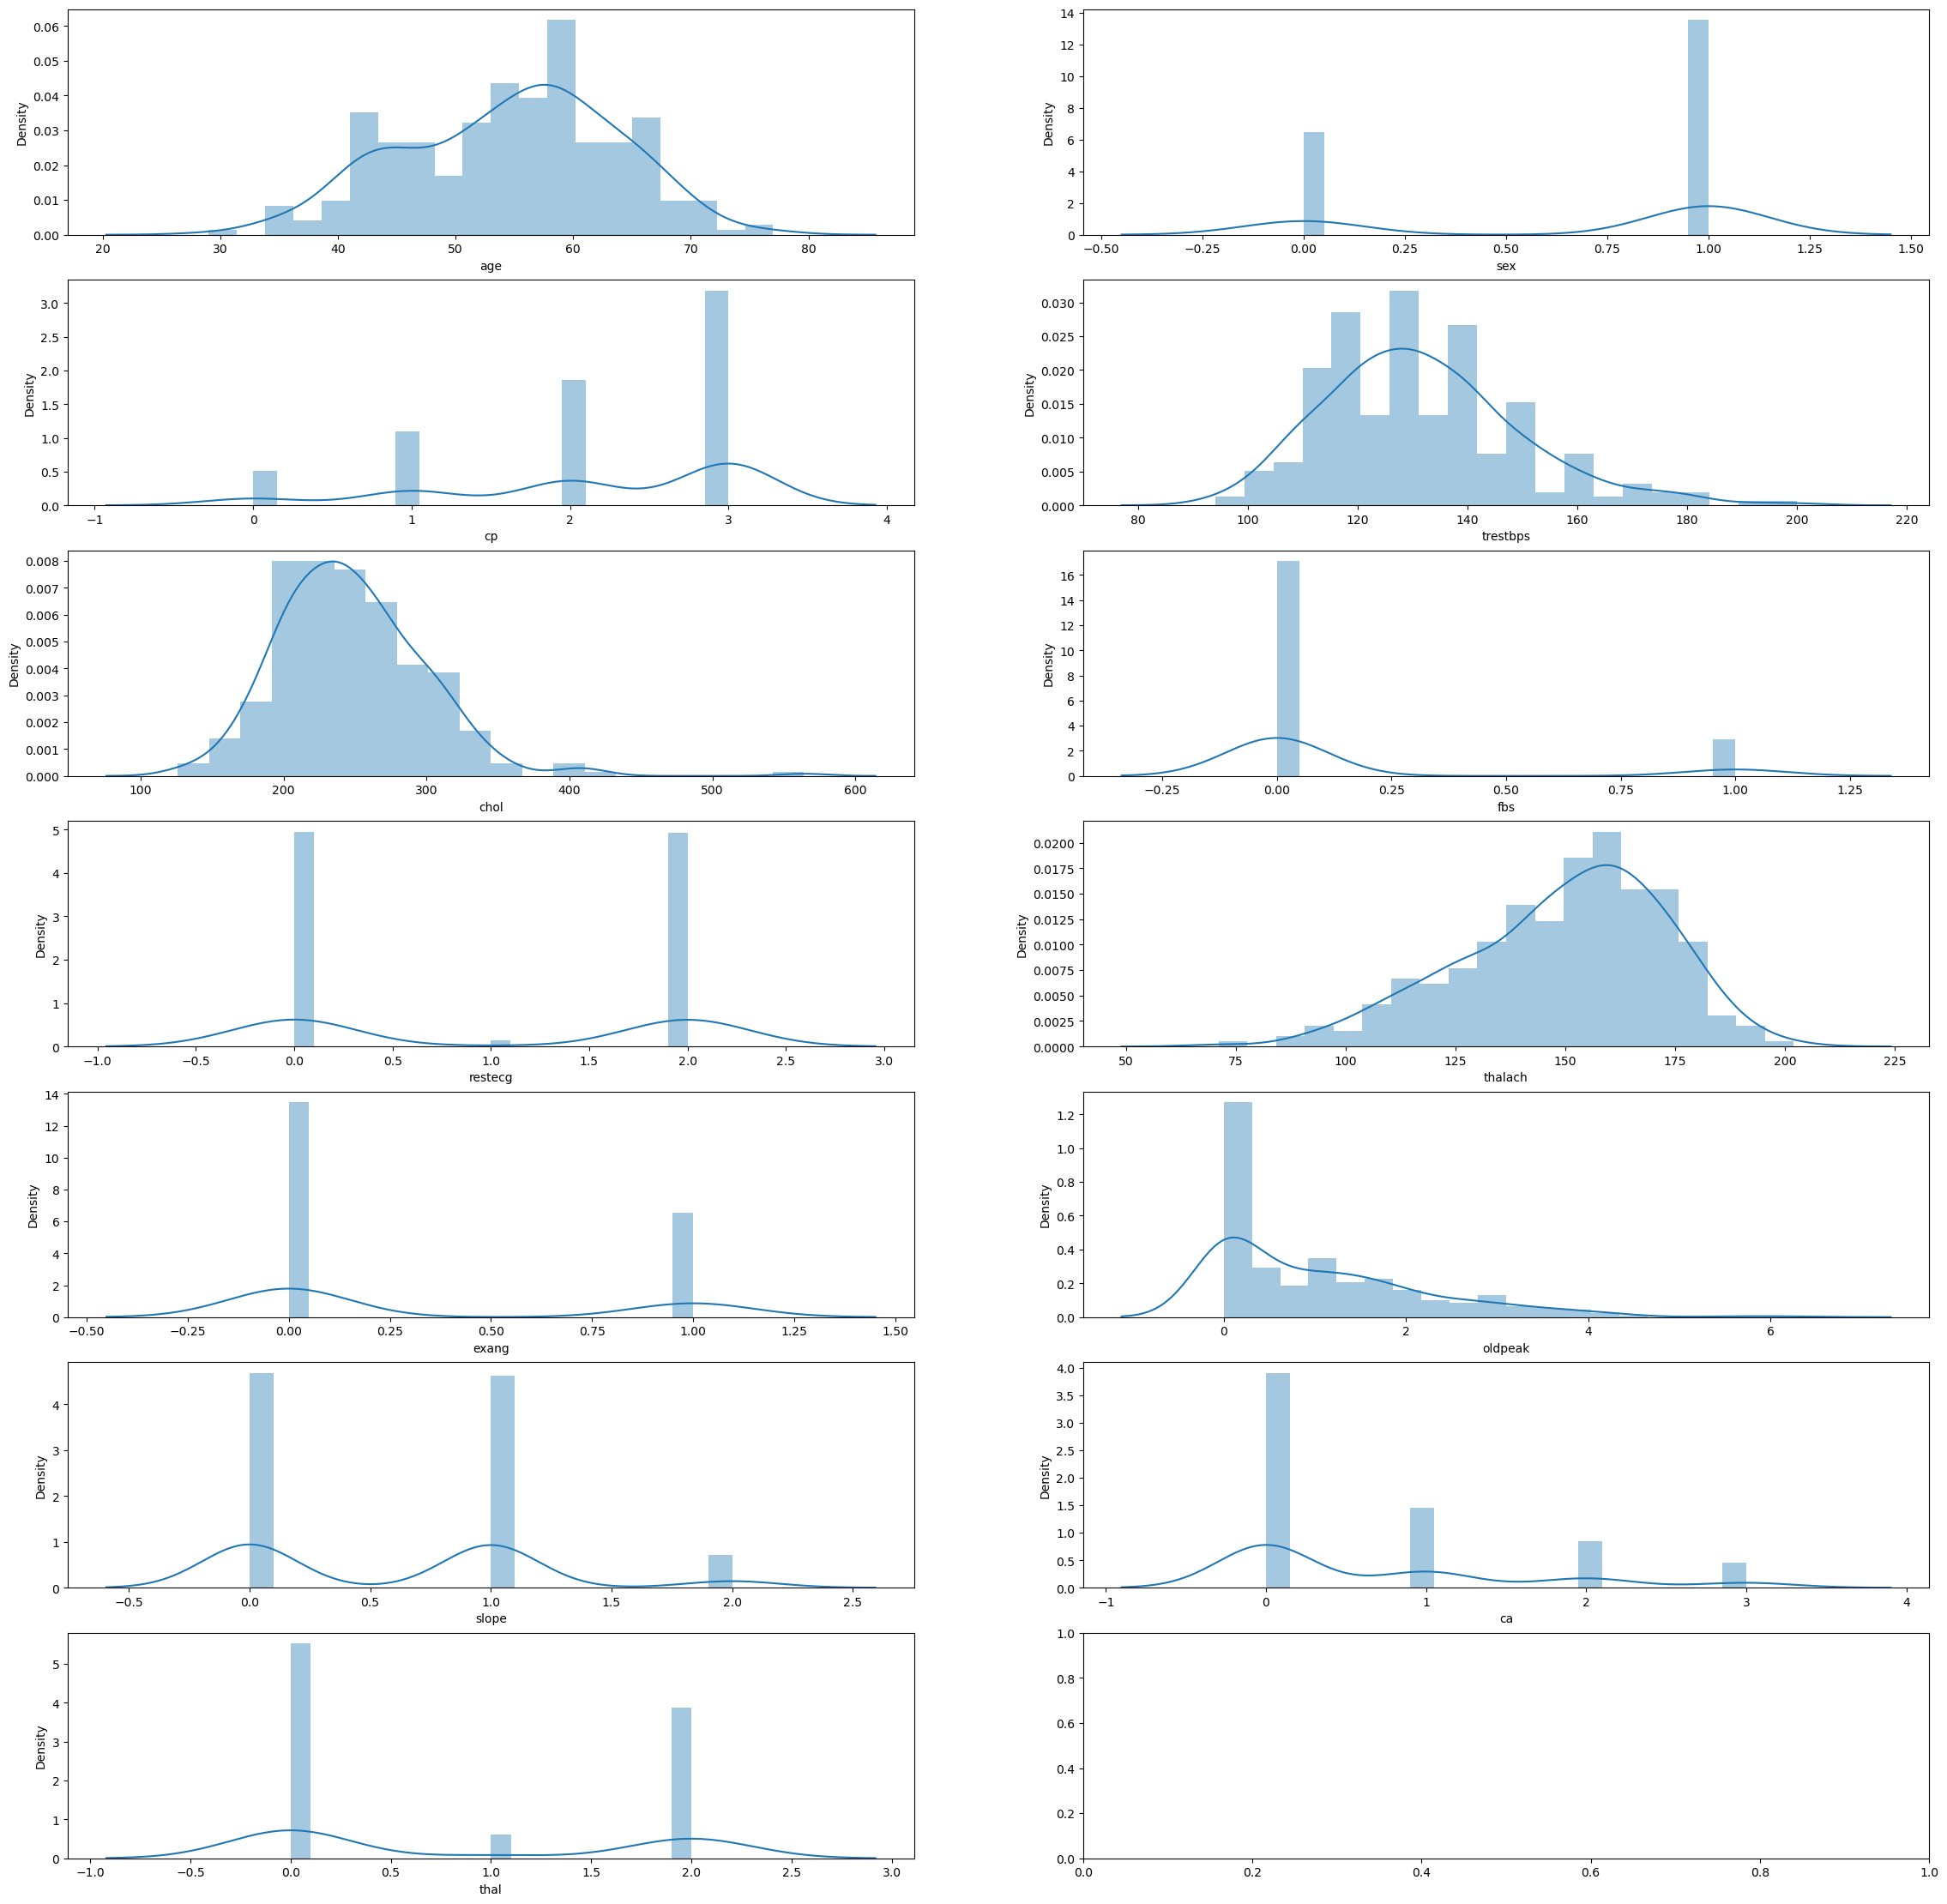

In [12]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(7,2, figsize=(28,28))
sns.distplot(df.age, bins = 20, ax=ax[0,0])
sns.distplot(df.sex, bins = 20, ax=ax[0,1])
sns.distplot(df.cp, bins = 20, ax=ax[1,0])
sns.distplot(df.trestbps, bins = 20, ax=ax[1,1])
sns.distplot(df.chol, bins = 20, ax=ax[2,0])
sns.distplot(df.fbs, bins = 20, ax=ax[2,1])
sns.distplot(df.restecg, bins = 20, ax=ax[3,0])
sns.distplot(df.thalach, bins = 20, ax=ax[3,1])
sns.distplot(df.exang, bins = 20, ax=ax[4,0])
sns.distplot(df.oldpeak, bins = 20, ax=ax[4,1])
sns.distplot(df.slope, bins = 20, ax=ax[5,0])
sns.distplot(df.ca, bins = 20, ax=ax[5,1])
sns.distplot(df.thal, bins = 20, ax=ax[6,0])

In [13]:
df.groupby("target").agg({"sex":"mean"})

,sex
target,
0,0.556250
1,0.817518


In [14]:
df.groupby("target").agg({"cp":"mean"})

,cp
target,
0,1.793750
1,2.583942


In [15]:
df.groupby("target").agg({"trestbps":"mean"})

,trestbps
target,
0,129.175000
1,134.635036


In [16]:
df.groupby("target").agg({"chol":"mean"})

,chol
target,
0,243.493750
1,251.854015


In [17]:
df.groupby("target").agg({"fbs":"mean"})

,fbs
target,
0,0.143750
1,0.145985


In [18]:
df.groupby("target").agg({"restecg":"mean"})

,restecg
target,
0,0.843750
1,1.175182


In [19]:
df.groupby("target").agg({"thalach":"mean"})

,thalach
target,
0,158.581250
1,139.109489


In [20]:
df.groupby("target").agg({"exang":"mean"})

,exang
target,
0,0.143750
1,0.540146


In [21]:
df.groupby("target").agg({"oldpeak":"mean"})

,oldpeak
target,
0,0.598750
1,1.589051


In [22]:
df.groupby("target").agg({"slope":"mean"})

,slope
target,
0,0.412500
1,0.824818


In [23]:
df.groupby("target").agg({"ca":"mean"})

,ca
target,
0,0.275000
1,1.145985


In [24]:
df.groupby("target").agg({"thal":"mean"})

,thal
target,
0,0.375000
1,1.372263


In [25]:
# Access to the correlation of the data set was provided. What kind of relationship is examined between the variables.
# If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 means no correlation.
# If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases.
# When the correlations are examined, there are 2 variables that act as a positive correlation to the Salary dependent variable.

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


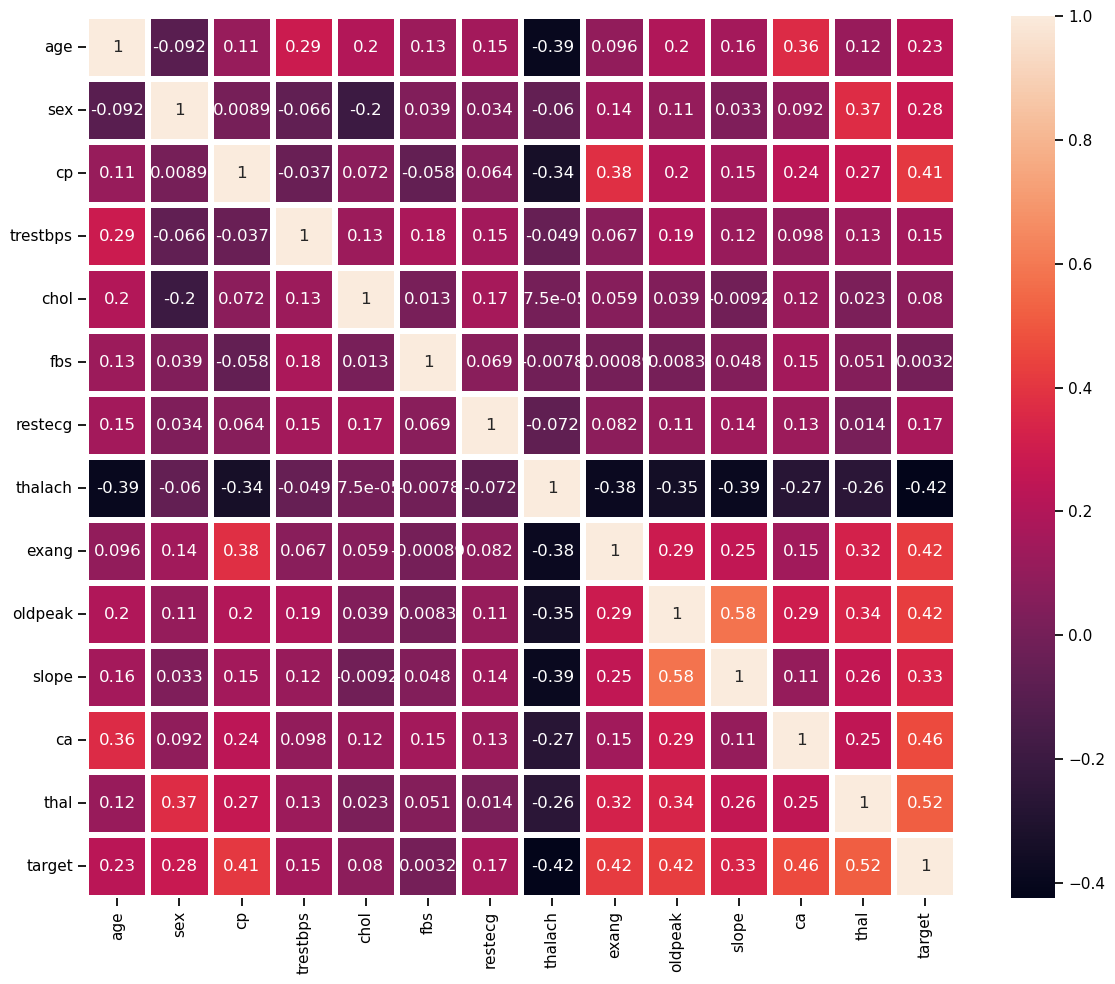

In [26]:
plt.figure(figsize=(12,10))
sns.set_context(context='notebook',font_scale=1)
sns.heatmap(df.corr(),annot=True,linewidth=3)
plt.tight_layout()

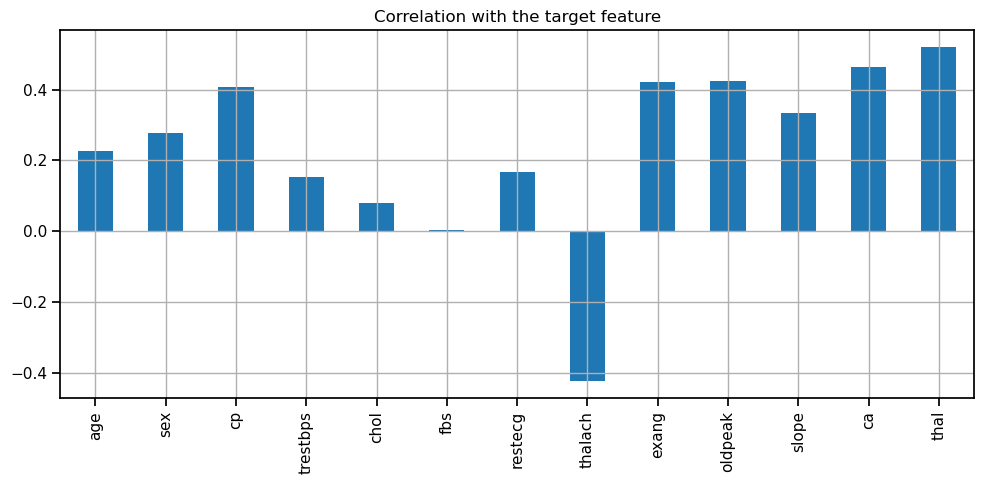

In [27]:
sns.set_context(context='notebook',font_scale=1)
df.drop('target',axis=1).corrwith(df.target).plot(kind='bar',grid=True,figsize=(10,5),title='Correlation with the target feature')
plt.tight_layout()

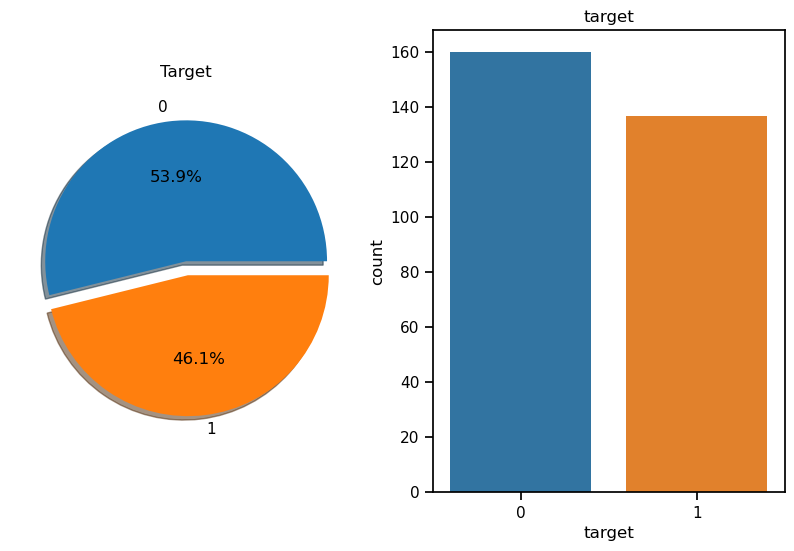

In [28]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(10,6))
df['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Target')
ax[0].set_ylabel('')
sns.countplot(x='target',data=df, ax=ax[1])
ax[1].set_title('target')
plt.show()

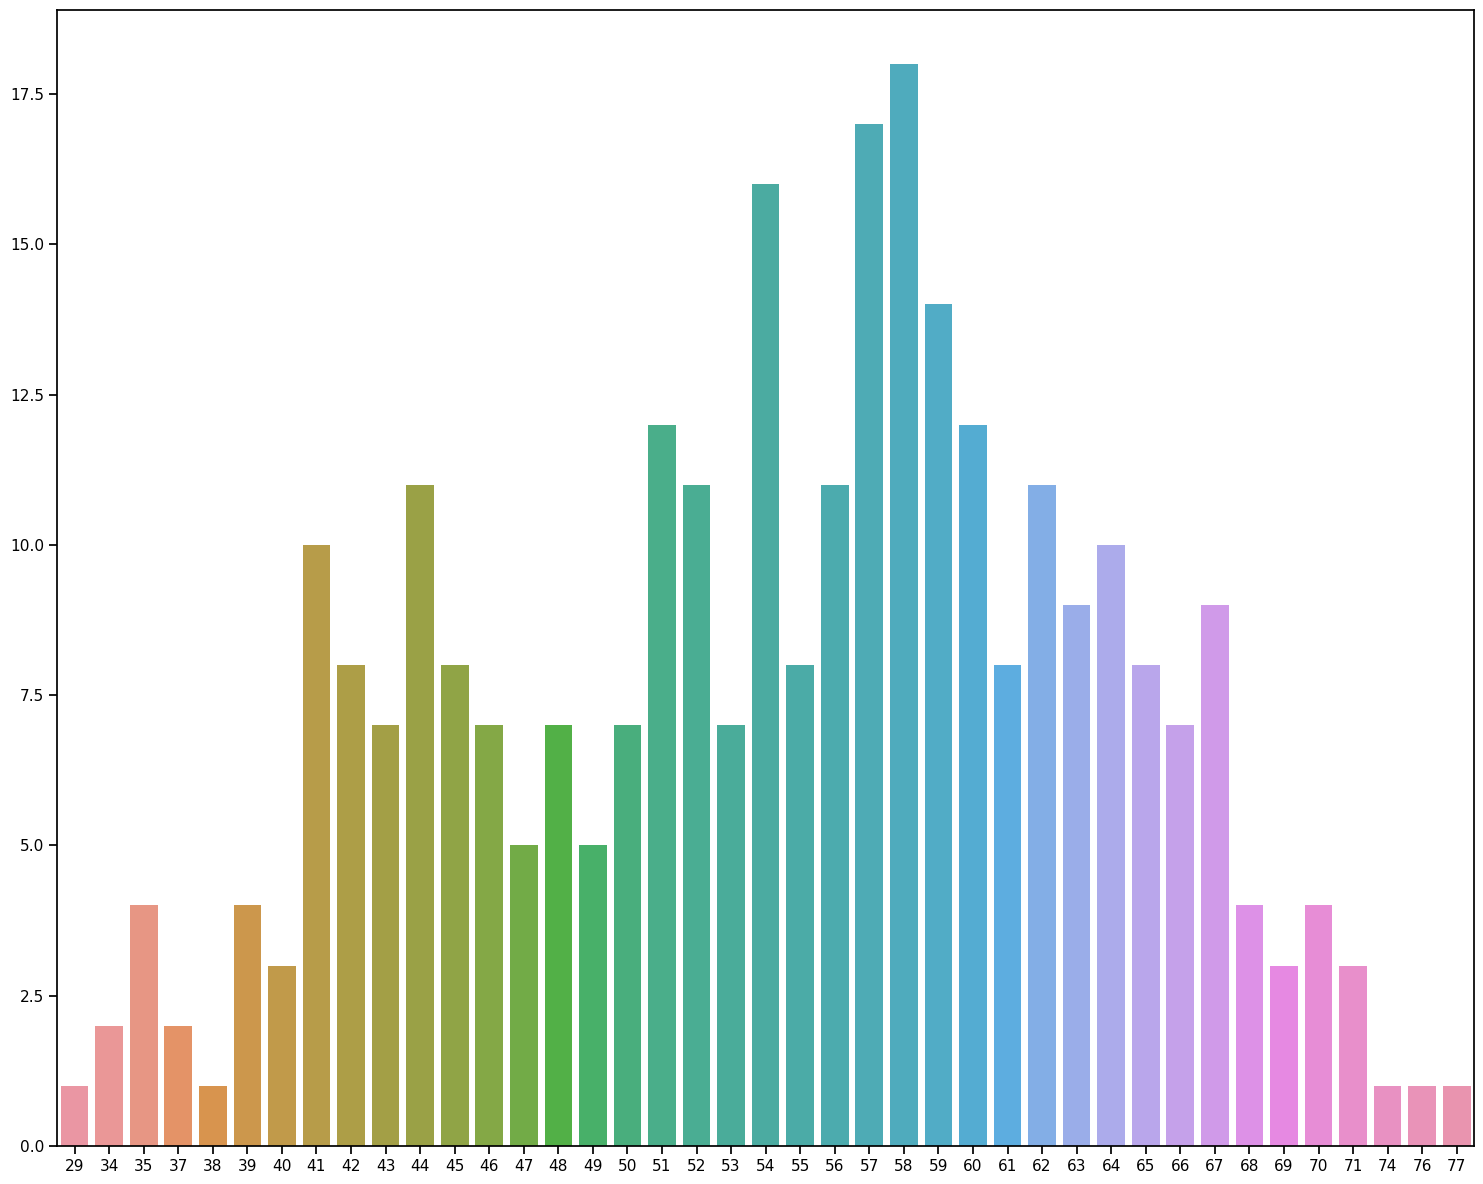

In [29]:
plt.figure(figsize=(15,12))
sns.set_context('notebook',font_scale=1)
sns.barplot(x=df.age.value_counts()[:50].index, y=df.age.value_counts()[:50].values)
plt.tight_layout()

In [30]:
minAge=min(df.age)
maxAge=max(df.age)
print('Min Age: ',minAge)
print('Max Age: ',maxAge)

Min Age:  29
Max Age:  77


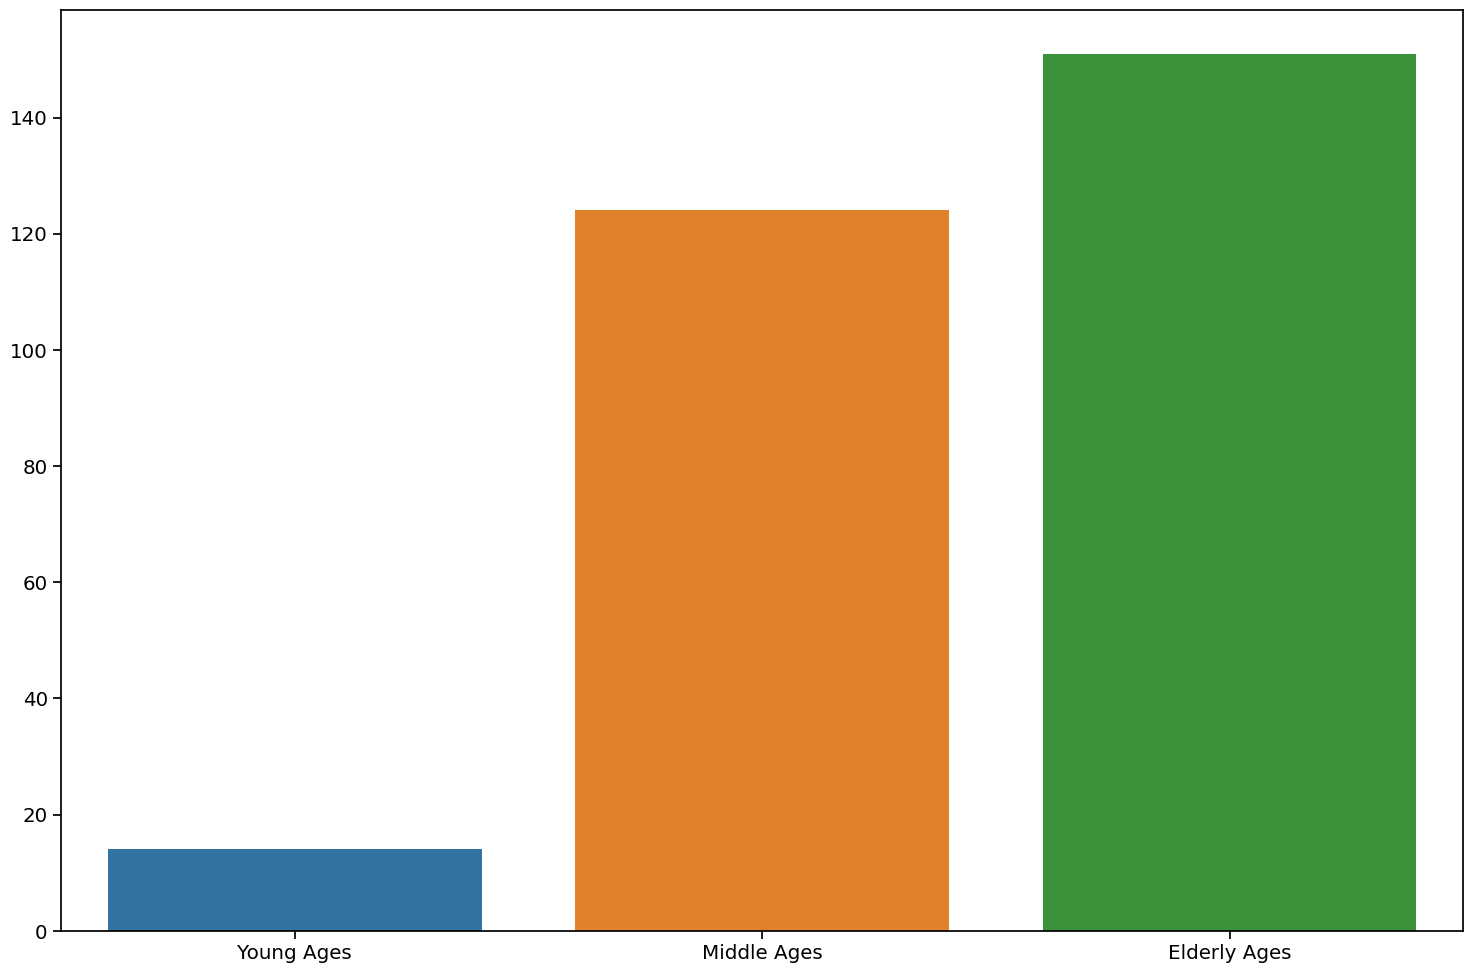

In [31]:
Young = df[(df.age>=29)&(df.age<40)]
Middle = df[(df.age>=40)&(df.age<55)]
Elder = df[(df.age>55)]
plt.figure(figsize=(15,10))
sns.set_context('notebook',font_scale=1.3)
sns.barplot(x=['Young Ages','Middle Ages','Elderly Ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

([<matplotlib.patches.Wedge at 0x1dee4e98670>,
 [Text(1.0872859344029535, 0.1667611970738291, 'Young Ages'),
  Text(-0.08958279670379564, 1.0963461691157255, 'Middle Ages'),
  Text(-0.0847199697548385, -1.197005650247625, 'Elderly Ages')],
 [Text(0.5930650551288836, 0.09096065294936131, '4.844291%'),
  Text(-0.0488633436566158, 0.5980070013358502, '42.906573%'),
  Text(-0.04941998235698913, -0.6982532959777812, '52.249134%')])

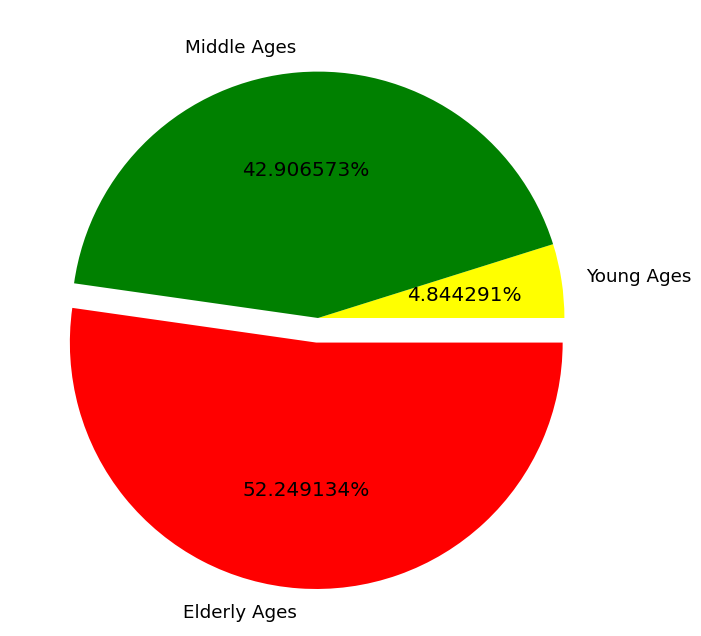

In [32]:
colors = ['yellow','green','red']
explode = [0,0,0.1]
plt.figure(figsize=(10,8))
sns.set_context('notebook',font_scale=1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['Young Ages','Middle Ages','Elderly Ages'],explode=explode,colors=colors,autopct='%1f%%')

2) Data Preprocessing

In [33]:
# Now, we can look at where are missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [34]:
# Check for missing values in the dataset
df.isnull().sum().sum()

0

In this dataset there is no missing values but if in any dataset any missing values are present then the missing observations should be analyse first then proceed further.

2.2) Outlier Observation Analysis

In [35]:
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
for feature in df:

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR

    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

age no
sex no
cp no
trestbps yes
chol yes
fbs yes
restecg no
thalach no
exang no
oldpeak yes
slope no
ca yes
thal no
target no


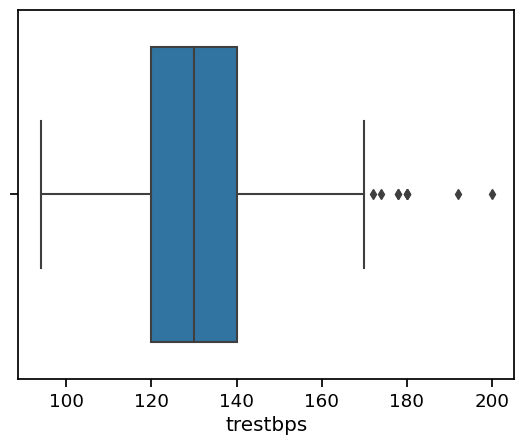

In [36]:
# The process of visualizing the trestbps variable with boxplot method was done. We find the outlier observations on the chart.
import seaborn as sns
sns.boxplot(x = df["trestbps"]);

In [37]:
#We conduct a stand alone observation review for the trestbps variable
#We suppress contradictory values
Q1 = df.trestbps.quantile(0.25)
Q3 = df.trestbps.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["trestbps"] > upper,"trestbps"] = upper

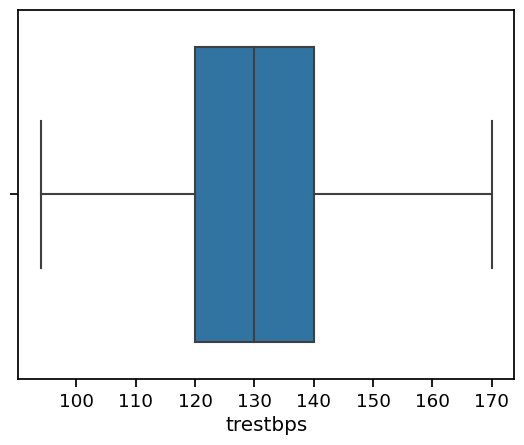

In [38]:
import seaborn as sns
sns.boxplot(x = df["trestbps"]);

2.3)Local Outlier Factor (LOF)

In [39]:
# We determine outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [40]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-4.46792209, -1.80908984, -1.72833571, -1.67984343, -1.67774711,
       -1.65713287, -1.62220382, -1.59199311, -1.48720659, -1.48058037,
       -1.43877445, -1.4152415 , -1.39765172, -1.3884511 , -1.38249095,
       -1.38217719, -1.37642673, -1.37035775, -1.34822531, -1.34374183,
       -1.32022522, -1.29191667, -1.28788323, -1.27342686, -1.27035542,
       -1.26007589, -1.25915727, -1.25752699, -1.25384766, -1.23440704])

In [41]:
#We choose the threshold value according to lof scores
threshold = np.sort(df_scores)[7]
threshold

-1.5919931108634262

In [42]:
#We delete those that are higher than the threshold
outlier = df_scores > threshold
df = df[outlier]

In [43]:
# The size of the data set was examined.
df.shape

(289, 14)

3) Accuracy checking using different Models

In [44]:
x=df.iloc[:,:13].values
y=df.iloc[:,13].values
print(x)

[[69.  1.  0. ...  1.  1.  0.]
 [69.  0.  0. ...  0.  2.  0.]
 [66.  0.  0. ...  2.  0.  0.]
 ...
 [35.  1.  3. ...  1.  0.  2.]
 [35.  0.  3. ...  0.  0.  0.]
 [35.  1.  3. ...  0.  0.  2.]]


In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
print(x_train)

[[ 0.3745422   0.69975365 -0.13326687 ...  0.62609903  0.39872611
   1.27268468]
 [ 0.2653639   0.69975365 -1.16132556 ... -0.98386991 -0.67783439
   1.27268468]
 [ 1.02961195  0.69975365  0.89479183 ...  2.23606798  0.39872611
  -0.82578777]
 ...
 [ 1.79385999 -1.42907436 -0.13326687 ... -0.98386991  0.39872611
  -0.82578777]
 [ 0.04700732 -1.42907436  0.89479183 ...  0.62609903  0.39872611
   1.27268468]
 [ 0.15618561 -1.42907436 -1.16132556 ...  0.62609903 -0.67783439
  -0.82578777]]


In [47]:
x_test=sc.transform(x_test)
print(x_test)

[[-0.93559731  0.69975365 -0.13326687  1.12323269 -0.29016918 -0.39380225
  -1.03060827 -0.1342586  -0.69242476  2.19886385  0.62609903 -0.67783439
  -0.82578777]
 [-0.93559731  0.69975365  0.89479183  0.51577585  1.4424236  -0.39380225
  -1.03060827 -1.32061644  1.44420022  0.6333662   0.62609903  1.47528661
   1.27268468]
 [ 0.15618561  0.69975365  0.89479183  0.02981038 -1.30806744 -0.39380225
   0.98397441 -1.97970413  1.44420022  0.89428248  0.62609903  0.39872611
   0.22344845]
 [-1.48148876  0.69975365 -1.16132556  0.21204743 -0.89657666 -0.39380225
  -1.03060827 -0.79334629 -0.69242476 -0.93213144  0.62609903 -0.67783439
   0.22344845]
 [-0.17134926  0.69975365 -0.13326687 -0.09168099 -1.02652112  2.53934556
   0.98397441  0.08543729 -0.69242476  0.11153365  2.23606798 -0.67783439
  -0.82578777]
 [ 0.92043365 -1.42907436 -1.16132556  0.51577585 -1.06983594 -0.39380225
  -1.03060827  1.27179513 -0.69242476 -0.93213144 -0.98386991  1.47528661
  -0.82578777]
 [ 0.59289878 -1.42907

In [48]:
# using KNN for classification

from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(weights='distance')
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)
# print(y_pred)
# print(y_test)
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_pred)
print(c)

from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print("Accuracy of using KNN=",acc)

[[29  7]
 [10 27]]
Accuracy of using KNN= 0.7671232876712328


In [49]:
# using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)


from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(weights='distance')
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)

from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_pred)
print(c)

from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print("Accuracy of using KNN (MinMaxScaler)=",acc)

[[34  2]
 [16 21]]
Accuracy of using KNN (MinMaxScaler)= 0.7534246575342466


In [50]:
# Using SVM classifier

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
#print(x_train)

x_test=sc.transform(x_test)
#print(x_test)
from sklearn.svm import SVC
sv=SVC(kernel='linear',random_state=1)   #kernel=rbf,poly,sigmoid
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)
#print(y_pred)
#print(y_test)

from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_pred)
#print(c)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print("Accuracy using SVM(kernel=linear)=",acc)

Accuracy using SVM(kernel=linear)= 0.7397260273972602


In [51]:
from sklearn.svm import SVC
sv=SVC(kernel='rbf',random_state=1)   #kernel=rbf,poly,sigmoid
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)

from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_pred)
#print(c)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print("Accuracy using kernel(rbf)=",acc)

Accuracy using kernel(rbf)= 0.4931506849315068


In [52]:
from sklearn.svm import SVC
sv=SVC(kernel='poly',random_state=1)   #kernel=rbf,poly,sigmoid
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)
#print(y_pred)
#print(y_test)

from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_pred)
#print(c)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print("Accuracy using kernel(poly)=",acc)

Accuracy using kernel(poly)= 0.7123287671232876


In [53]:
from sklearn.svm import SVC
sv=SVC(kernel='sigmoid',random_state=1)   #kernel=rbf,poly,sigmoid
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)
#print(y_pred)
#print(y_test)
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_pred)
#print(c)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print("Accuracy using kernel(sigmoid)=",acc)

Accuracy using kernel(sigmoid)= 0.684931506849315


In [54]:
# Using Naive Bayes classification type

from sklearn.naive_bayes import GaussianNB
sv=GaussianNB()
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)
from sklearn.metrics import accuracy_score
auc=accuracy_score(y_test,y_pred)
print("Accuracy using Naive Bayes=",auc)

Accuracy using Naive Bayes= 0.726027397260274


Predictive Model

Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [56]:
#Splitting the features and target

x = df.drop(columns='target',axis=1)
y = df['target']

In [57]:
#Training, testing & splitting the data
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.01,random_state=42)

In [58]:
print(x.shape, x_train.shape, x_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(289, 13) (286, 13) (3, 13)
(289,) (286,) (3,)


Model Training

In [59]:
model = LogisticRegression()

In [60]:
#training the LogisticRegression model with training data
model.fit(x_train, y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [61]:
#accuracy on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

#accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [62]:
print('Accuracy on Training data : ', training_data_accuracy)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Training data :  0.8531468531468531
Accuracy on Test data :  1.0


In [63]:
from sklearn.metrics import accuracy_score

# Assuming 'log' is your trained model, replace with the actual name
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[1, 0],
       [0, 2]], dtype=int64)

Input Data To Check The Predictive Model

In [65]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)
#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
  print("The Person does not have a Heart Disease")
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


In [66]:
input_data = (69,1,0,160,234,1,2,131,0,0.1,1,1,0)
#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
  print("The Person does not have a Heart Disease")
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease
